# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [6]:
#1

!git clone https://github.com/miacachion/visualization_assignment.git

df = pd.read_csv('./visualization_assignment/data/college_completion.csv')

Cloning into 'visualization_assignment'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 16 (delta 2), reused 1 (delta 1), pack-reused 12 (from 1)
Receiving objects: 100% (16/16), 1.88 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [7]:
#2

df.shape
df.columns

# Dimensions: 3798 observations, 63 variables

# Variables included: 'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
#       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
#       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
#       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
#       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
#       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
#       'endow_value', 'endow_percentile', 'grad_100_value',
#       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
#       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
#       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
#       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
#       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
#       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
#       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
#       'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
#       'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer',
#       'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer',
#       'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer',
#       'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames',
#       'cohort_size'

df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [8]:
#3

pd.crosstab(df['control'], df['level'])

# Patterns noticed: Across this data set 2-year universities are most commonly public and 4-year universities most commonly private not-for-profit
#                   Smallest recorded value is 2-year private not-for-profit, highest recorded value is 4-year private not-for-profit

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


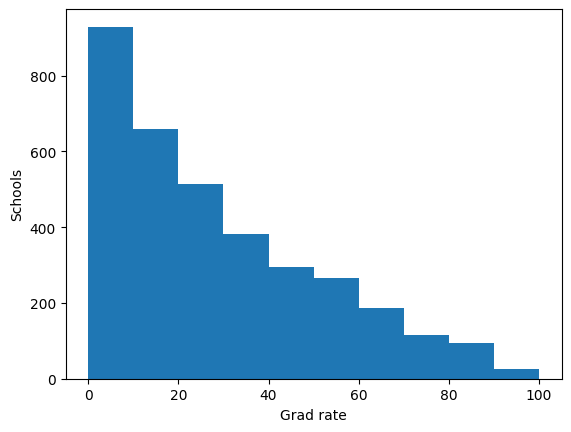

In [11]:
#4

# Histogram

plt.hist(df['grad_100_value'])
plt.xlabel('Grad rate')
plt.ylabel('Schools')
plt.show()

<Axes: ylabel='Density'>

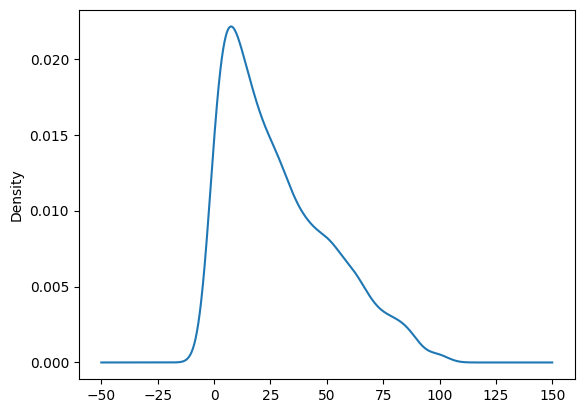

In [13]:
# Kernel Density Plot

var='grad_100_value'
df[var].plot.density()

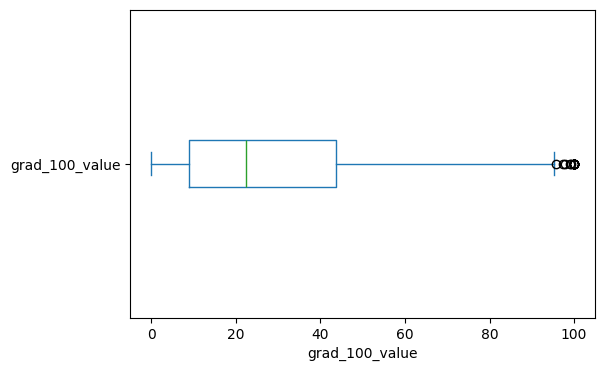

In [17]:
# Box Plot

df['grad_100_value'].plot.box(figsize=(6,4), vert=False)
plt.xlabel('grad_100_value')
plt.show()

In [18]:
# Statistical Description

df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000
